# Collider bias

In [1]:
using Distributions
using Plots
using Statistics
using Bootstrap

## Why you think beautiful people have bad personalities

In [2]:
function generate(N=100)
    personality = rand(Normal(), N)
    looks = rand(Normal(), N)
    # work out who is datable
    goodness = personality + looks
    datable = (goodness .> -0.5) .& (goodness .< +0.5);
    return (personality, looks, datable)
end

generate (generic function with 2 methods)

In [3]:
(personality, looks, datable) = generate();

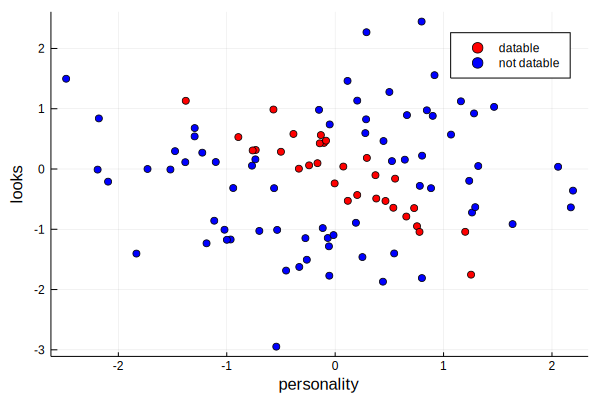

In [4]:
scatter(personality[datable.==1], looks[datable.==1],
    color="red", label = "datable", xlabel="personality", ylabel="looks", )
scatter!(personality[datable.==0], looks[datable.==0],
    color="blue", label = "not datable")

Correlation coefficient $\pm$ 95% Bootrap CI for **all** people:

In [5]:
bs_all = bootstrap(x -> cor(x[:,1], x[:,2]), [personality  looks], BasicSampling(1000))
confint(bs_all, BasicConfInt(0.95))

((-0.016788978200884506, -0.19560597270242935, 0.18477903120119005),)

Correlation coefficient $\pm$ 95% Bootrap CI for **datable** people only:

In [6]:
bs_all = bootstrap(x -> cor(x[:,1], x[:,2]), [personality[datable.==1] looks[datable.==1]], BasicSampling(1000))
confint(bs_all, BasicConfInt(0.95))

((-0.8892131525686375, -0.9728870649415504, -0.8422581762185768),)